## Introduction

The Oxford English Dictionary states that there are 171,146 words currently in use, plus and additional 218,302 obsolete words (source: https://www.bbc.com/news/world-44569277).

In [110]:
import re
import nltk
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# clean_word = lambda x: re.sub(r"[^a-z\-\ ]", '', x.lower())

## Data Preparation

We will need a list of five letter words to choose from in order to prediction the answer to a Wordle problem.  There are a few corpuses in the public domain that you can easily download using the NLTK package.  The steps below show you how to do that.

1. Download the word lists (corpuses), 
2. Explore them, 
3. Do data cleansing, and 
4. Filter the final list to only words with five letters.

### Download word lists from NLTK

Start out by [downloading a few English language corpuses from NLTK](https://www.nltk.org/data.html).  This only needs to be done once, since the files will be saved on your computer.  You should comment out the code in the cell below after running it.

In [2]:
# nltk.download()

### Explore the NKTK word lists

Take a look at the words given in a few of the downloaded lists: 'brown', 'words', and 'abc'.

In [3]:
corpus_brown = list(nltk.corpus.brown.words())
corpus_words = list(nltk.corpus.words.words())
corpus_abc   = list(nltk.corpus.abc.words())

print("corpus_brown:", corpus_brown[0:50], '\n')
print("corpus_words:", corpus_words[0:50],'\n')
print("corpus_abc:",   corpus_abc[0:50], '\n')

corpus_brown: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise'] 

corpus_words: ['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru', 'Ab', 'aba', 'Ababdeh', 'Ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally', 'abaction', 'abactor', 'abaculus', 'abacus', 'Abadite', 'abaff', 'abaft', 'abaisance', 'abaiser', 'abaissed', 'abalienate', 'abalienation', 'abalone', 'Abama', 'abampere', 'abandon', 'abandonable', 'abandoned', 

Obviously, some data cleaning is required.  Here are a few observations:

- Both upper and lower case letteres are used
- There are non alphabetic characters like appostrophes, dashes, and backticks
- Some list entries don't seem to be real words: 'aa', 'aam', and 'abac'
- There are many words with more or less than five characters that will need to be filtered out after cleaning

### Combine and clean the word lists

In [115]:
# Combine the three lists together into one list
corpus_combined = corpus_brown + corpus_words + corpus_abc

# Make all words lower case
corpus_lowercase = [x.lower() for x in corpus_combined]

# Remove words with non alphabetical characters
corpus_alph_only = [
    x
    for x
    in corpus_lowercase
    if x == re.sub(r'[^a-z]', '', x)
]

# Remove empty words
corpus_cleaned = [
    x
    for x
    in corpus_alph_only
    if x!=''
]

# Dedup the combined list
corpus_cleaned_and_deduped = list(set(corpus_cleaned))

# Print a random sample of 20 words from the list
print("corpus_cleaned_and_deduped:", 
      random.sample(corpus_cleaned_and_deduped, 20))

corpus_cleaned_and_deduped: ['foreship', 'ergotic', 'anarchic', 'deceives', 'disconform', 'astrictiveness', 'weiselbergite', 'smarten', 'indiscerptibility', 'dinkum', 'spruceness', 'subpoenas', 'uninspirited', 'apportioned', 'ipecacuanhic', 'astrobiologists', 'gerasene', 'scopulate', 'phacolite', 'vesicosigmoid']


### Plot the distribution of words by word length

In [125]:
l = [33,53,22,21,10,5,12]
l.sort()
print("l.sort()", l)
print(l[len(l) // 2])

l.sort() [5, 10, 12, 21, 22, 33, 53]
21


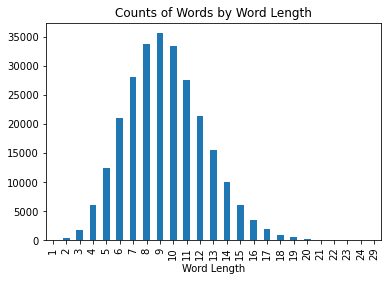

In [122]:
df_words = (
    pd.DataFrame({'word':corpus_cleaned_and_deduped})
    .assign(word_length = lambda x: 
            [len(y) for y in x.word])
    .groupby(['word_length'])
    .count()
    .rename(columns={'word':'words'})
)

df_words.plot(
    kind = 'bar',
    title = 'Counts of Words by Word Length',
    xlabel = 'Word Length',
    legend=False)

plt.show()

In [101]:
# Keep only words with five letters
corpus_5_letters = [
    x
    for x
    in corpus_deduped
    if len(x)==5
]

# Count how many words there are in the list
print("Number of 5 letter words:", len(corpus_5_letters))

Number of 5 letter words: 12357


In [77]:
# Pull out the singular part of plural words
singularized_words = [
    x.split("'")[0] 
    for x 
    in corpus_combined 
    if (len(x.split("'"))==2) & ((x[-2:]=="'s") | (x[-1:]=="'"))
]

# Change words like "over-all" to "overall"
compound_words_joined = [
    re.sub('\-', '', x)
    for x
    in corpus_combined
    if re.search('\-', x) != None
]

print("singularized_words:", singularized_words[0:20], '\n')
print("compound_words_joined:", compound_words_joined[0:20],'\n')

singularized_words: ['shaw', 'sportsmen', 'victor', 'growers', 'child', 'bromfield', 'dulles', 'gee', 'collins', 'week', 'semester', 'leavin', 'stations', 'carpenters', 'braque', 'concerto', 'poland', 'customer', 'lyricist', 'alcinous'] 

compound_words_joined: ['newlyscrubbed', 'sureenough', 'heroworshippers', 'fullsized', 'waterbalance', 'offbeat', 'downandouters', 'lp', 'boilerburner', '2yearold', 'antiintellectual', 'hellfire', 'cobalt60', 'piginfested', 'spanishamerican', 'linefragments', 'tailormade', 'clearchannel', 'khakibound', 'adiosrena'] 



In [73]:
# Combine all lists together
corpus_cleaned =  (
    singularized_words +
    compound_words_joined +
    corpus_combined
)

# Remove words with non alpha chars
corpus_cleaned = [
    x 
    for x 
    in corpus_cleaned 
    if re.sub('[^a-z]', '', x) == x
]

# Dedup and sort the list of words
corpus_cleaned = sorted(list(set(corpus_cleaned)))

print("Number of words in corpus_cleaned:", len(corpus_cleaned))

Number of words in corpus_cleaned: 263614


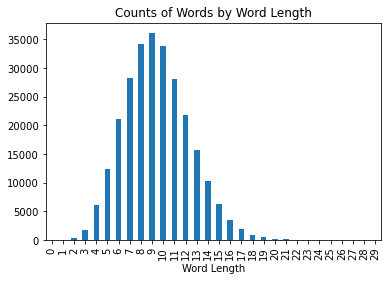

In [76]:
df_words = (
    pd.DataFrame({'word':corpus_cleaned})
    .assign(word_length = lambda x: 
            [len(y) for y in x['word']])
    .groupby(['word_length'])
    .count()
    .rename(columns={'word':'words'})
)

df_words.plot(
    kind = 'bar',
    title = 'Counts of Words by Word Length',
    xlabel = 'Word Length',
    legend=False)

plt.show()

In [75]:
# Remove words that don't have exactly 5 letters
corpus_five_letters = [
    x 
    for x 
    in corpus_cleaned 
    if len(x) == 5
]

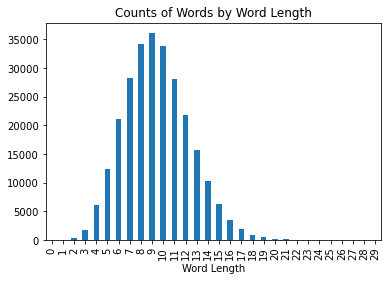

##  Download corpus, and make a list of 5-letter words

In [3]:


words_list = corpus['brown'] + corpus['words'] + corpus['abc']
words_list = [clean_word(x) for x in words_list]
words_list = sorted(list(set([clean_word(x) for x in words_list])))
print(f"Count of all clean words in NLTK corpuses:", len(words_list))

five_letter_words_list = [x for x in words_list if len(x)==5]
print("Count of all 5-letter words:", len(five_letter_words_list))

Count of all clean words in NLTK corpuses: 265121
Count of all 5-letter words: 12568


In [4]:
sum([1 for x in five_letter_words_list if x=='where'])

1

In [5]:
set('aosslatcastastidrangloanglo')

{'a', 'c', 'd', 'g', 'i', 'l', 'n', 'o', 'r', 's', 't'}

---

## Parameters to change after each Wordle attempt

In [6]:
char_freq_index = {k: v for v, k in enumerate(list("easroiltndcuhmypbgkfwvjzxq"))}
word_score            = lambda w: sum([char_freq_index[x] for x in list(w)])

def get_possible_words(green_letters='_____', 
                       orange_letters='', 
                       gray_letters='', 
                       dups=True, 
                       word_length = 5,
                       word_list = five_letter_words_list
                      ):
    
    orange = [ (int(x[0])-1, x[1].lower()) for x in orange_letters.split()]
    green = green_letters.lower()
    gray = ''.join(sorted(set(gray_letters.lower())))
    
    has_green     = lambda w: all([w[i]==green[i] for i in range(word_length) if green[i]!='_'])
    has_orange    = lambda w: all([((w[k]!=v) and (v in w)) for k,v in orange]) if orange else True
    has_gray      = lambda w: len(remove_gray(w)) < len(w)
    has_dups      = lambda w: len(list(set(w)))==len(w)
    
    remove_green  = lambda w: ''.join([w[i] for i in range(word_length) if green[i]=='_'])
    remove_gray   = lambda w: re.sub(fr'[{gray}]', '', w) if gray else w
    
#     remove_orange = lambda w: all([((w[k]!=v) and (v in w)) for k,v in orange]) if orange else True
    # todo: add a `remove_orange` function

    
    # Step 1 - Filter the list to words with matching green letters in the correct positions
    possible_words_1 = [w for w in word_list if has_green(w)]
    
    # Step 2 - Filter the list to words with matching orange letters, but not in the correct positions
    possible_words_2 = [w for w in possible_words_1 if has_orange(w)]
    
    # Step 3 - Filter the list to just words where, with the green (and maybe orange letters) removed, there are no gray letters
    possible_words_3 = [w for w in possible_words_2 if not has_gray(remove_green(w))]

    # Step 4 - Order the words by the frequencies scores of their letters
    possible_words_4 = sorted([[word_score(x), x] for x in possible_words_3])
    
    # Step 5 - Remove the score from the beginning of each word
    possible_words_5 = [x[1] for x in possible_words_4]
    
    # Step 6 - Remove words with duplicate matching green characters
    possible_words_6 =[x for x in possible_words_5 if has_dups(x)] if not dups else possible_words_5
    
    return possible_words_6

In [42]:
dups = False
n=50

## Wordl (Single word)

In [47]:
green = '_roth'    # A 5 char string with '_' chars for unknowns. Starting value: '_____'
orange = '1r 2h 5o'        # A string of position+char values (ex: '2a 2e 5n').  
gray = 'aseinb'         # A string of characters to exclude. Example: 'enu'

if not len(green)==5: print("green is not 5 characters")

In [48]:
possible_words_list = get_possible_words(green, orange, gray, dups)[0:n]
print(possible_words_list)

['groth', 'froth', 'wroth']


## Quordl (4 words)

#### Starter code:
word_list_1a =get_possible_words(green_letters = '_____', 
                                orange_letters='', 
                                gray_letters='', dups=dups)

word_list_1b =get_possible_words(green_letters = '_____', 
                                orange_letters='', 
                                gray_letters='', dups=dups)

word_list_2a =get_possible_words(green_letters = '_____', 
                                orange_letters='', 
                                gray_letters='', dups=dups)

word_list_2b =get_possible_words(green_letters = '_____', 
                                orange_letters='', 
                                gray_letters='', dups=dups)

In [38]:
# Word 1
word_list_1a =get_possible_words(green_letters = 'scope', 
                                orange_letters='4s 5o 1c 2o 4c', 
                                gray_letters='arratilnrahngo', dups=dups)

word_list_1b =get_possible_words(green_letters = 'blo_e', 
                                orange_letters='5o 2o', 
                                gray_letters='arsraticnrachscp', dups=dups)

word_list_2a =get_possible_words(green_letters = 'roach', 
                                orange_letters='1a 2r 3o 5o 1c', 
                                gray_letters='setile', dups=dups)

word_list_2b =get_possible_words(green_letters = 'bongo', 
                                orange_letters='3o 4n', 
                                gray_letters='arseraticlerachscpe', dups=dups)

In [39]:
print("word_list_1a:", word_list_1a[0:n], '\n')
print("word_list_1b:", word_list_1b[0:n], '\n')
print("word_list_2a:", word_list_2a[0:n], '\n')
print("word_list_2b:", word_list_2b[0:n], '\n')

word_list_1a: ['scope'] 

word_list_1b: ['bloke'] 

word_list_2a: ['roach'] 

word_list_2b: ['bongo'] 



In [37]:
all_possible_words = list(set(word_list_1a + word_list_1b + word_list_2a + word_list_2b))

all_common_words = list(set(word_list_1a).intersection(word_list_1b).intersection(word_list_2a).intersection(word_list_2b))

print(f"(1) top {n} guesses:\n", sorted([[word_score(x), x] for x in all_possible_words])[0:n])
print("\n=======================================================================================\n")
print(f"(2) top {n} intersecting guesses:\n", sorted([[word_score(x), x] for x in all_common_words])[0:n])

(1) top 50 guesses:
 [[27, 'eloge'], [30, 'roach'], [31, 'scope'], [33, 'nondo'], [40, 'glome'], [43, 'globe'], [44, 'bloke'], [46, 'mongo'], [48, 'bonbo'], [48, 'donzo'], [48, 'glove'], [49, 'bongo'], [50, 'gloze'], [51, 'kongo']]


(2) top 50 intersecting guesses:
 []


In [29]:
all_common_words_except_1a = list(set(word_list_1b).intersection(word_list_2a).intersection(word_list_2b))
all_common_words_except_1b = list(set(word_list_1a).intersection(word_list_2a).intersection(word_list_2b))
all_common_words_except_2a = list(set(word_list_1a).intersection(word_list_1b).intersection(word_list_2b))
all_common_words_except_2b = list(set(word_list_1a).intersection(word_list_1b).intersection(word_list_2a))

all_common_words_row_1 = list(set(word_list_1a).intersection(word_list_1b))
all_common_words_row_2 = list(set(word_list_2a).intersection(word_list_2b))
all_common_words_col_a = list(set(word_list_1a).intersection(word_list_2a))
all_common_words_col_b = list(set(word_list_1b).intersection(word_list_2b))

print(f"(1) top {n} common_words_except_1a:\n", sorted([[word_score(x), x] for x in all_common_words_except_1a])[0:n])
print("\n=======================================================================================\n")
print(f"(2) top {n} common_words_except_1b:\n", sorted([[word_score(x), x] for x in all_common_words_except_1b])[0:n])
print("\n=======================================================================================\n")
print(f"(3) top {n} common_words_except_2a:\n", sorted([[word_score(x), x] for x in all_common_words_except_2a])[0:n])
print("\n=======================================================================================\n")
print(f"(4) top {n} common_words_except_2b:\n", sorted([[word_score(x), x] for x in all_common_words_except_2b])[0:n])

print("\n=======================================================================================\n")
print(f"(5) top {n} common_words_row_1:\n", sorted([[word_score(x), x] for x in all_common_words_row_1])[0:n])
print("\n=======================================================================================\n")
print(f"(6) top {n} common_words_row_2:\n", sorted([[word_score(x), x] for x in all_common_words_row_2])[0:n])
print("\n=======================================================================================\n")
print(f"(7) top {n} common_words_col_a:\n", sorted([[word_score(x), x] for x in all_common_words_col_a])[0:n])
print("\n=======================================================================================\n")
print(f"(8) top {n} common_words_col_b:\n", sorted([[word_score(x), x] for x in all_common_words_col_b])[0:n])



(1) top 50 common_words_except_1a:
 []


(2) top 50 common_words_except_1b:
 []


(3) top 50 common_words_except_2a:
 []


(4) top 50 common_words_except_2b:
 []


(5) top 50 common_words_row_1:
 []


(6) top 50 common_words_row_2:
 []


(7) top 50 common_words_col_a:
 []


(8) top 50 common_words_col_b:
 []
